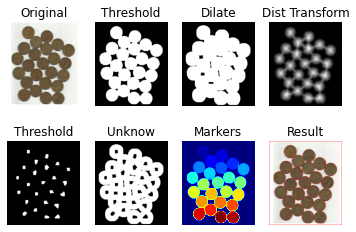

In [1]:
import numpy as np
import cv2
%matplotlib inline
from matplotlib import pyplot as plt

src = cv2.imread("/home/retoo/Desktop/实验/数据集/4.数字图像处理/8.png")
img = src.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(
    gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# 消除噪声
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# 膨胀
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# 距离变换
dist_transform = cv2.distanceTransform(opening, 1, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# 获得未知区域
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# 标记
ret, markers1 = cv2.connectedComponents(sure_fg)

# 确保背景是1不是0
markers = markers1 + 1

# 未知区域标记为0
markers[unknown == 255] = 0

markers3 = cv2.watershed(img, markers)
img[markers3 == -1] = [0, 0, 255]

plt.subplot(241), plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB)),
plt.title('Original'), plt.axis('off')
plt.subplot(242), plt.imshow(thresh, cmap='gray'),
plt.title('Threshold'), plt.axis('off')
plt.subplot(243), plt.imshow(sure_bg, cmap='gray'),
plt.title('Dilate'), plt.axis('off')
plt.subplot(244), plt.imshow(dist_transform, cmap='gray'),
plt.title('Dist Transform'), plt.axis('off')
plt.subplot(245), plt.imshow(sure_fg, cmap='gray'),
plt.title('Threshold'), plt.axis('off')
plt.subplot(246), plt.imshow(unknown, cmap='gray'),
plt.title('Unknow'), plt.axis('off')
plt.subplot(247), plt.imshow(np.abs(markers), cmap='jet'),
plt.title('Markers'), plt.axis('off')
plt.subplot(248), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),
plt.title('Result'), plt.axis('off')
plt.show()